<a href="https://colab.research.google.com/github/maksmanikowski/neural_networks/blob/main/dl01_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning
<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marcinsawinski/UEP_KIE_DL_CODE/blob/main/dl01_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# Excercise 1: Perceptron
- define _step function_ that takes value (z) and returns 
Heaviside step function\
$
Heaviside(z) =
\begin{cases}
0\ \text{if}\ z<0\\
1\ \text{if}\ z \ge 0
\end{cases}
$
- define _Perceptron_ function that takes:
    - data: numpy array of shape (m,n)
    - labels: numpy array of shape (m,1)
    - lr: learning rate ($\eta$)
    - e: number of epochs
- add bias term (column with values equal to 1)
- initialize weights with zeros
- loop through epochs
    - loop through instances
        - compute output($\hat{y}$) as $Heaviside(z)$, where $z = x^T w$\
        NOTE: rows of X contain transposed data so use np.dot(x[i], w)
        - calculate new weights $w_{i,j}^{(next\,step)} = w_{i,j}+\eta(y_j-\hat y_j)x_i$
- return trained weights
- draw decision boundary
        



In [26]:
import matplotlib.pyplot as plt
import numpy as np
class_size = 50
np.random.seed(42)
# Generate data points
X1 = np.random.normal(0,1,(class_size,2)).round(1)
print(X1[:5])
X2 = np.random.normal(0,1,(class_size,2)).round(1)+np.random.randint(-5,5, (1,2))
print(X2[:5])
X_train = np.concatenate((X1, X2)) # size (100, 2)
X_train[-5:]

[[ 0.5 -0.1]
 [ 0.6  1.5]
 [-0.2 -0.2]
 [ 1.6  0.8]
 [-0.5  0.5]]
[[-5.4  3.6]
 [-4.3  3.2]
 [-4.2  4.4]
 [-2.1  4.2]
 [-3.7  3.9]]


array([[-4.4,  4.9],
       [-3.8,  2.8],
       [-3.8,  4.4],
       [-4.9,  4.2],
       [-3.9,  2.9]])

In [27]:
X_train.shape

(100, 2)

In [28]:
# Generate labels
y_train = np.concatenate((np.zeros(class_size),np.ones(class_size))) # len=100
y_train

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

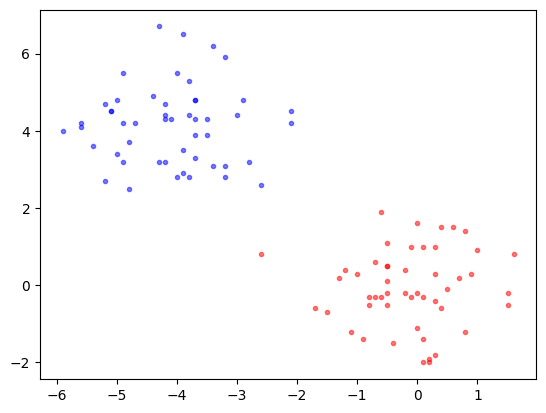

In [29]:
#plot data points
def plot_data(X,y):
    # plt.scatter(X[:,0],X[:,1],c=y, alpha=0.6)
    plt.plot(X[:,0][y==0],X[:,1][y==0], 'r.',alpha=0.5)
    plt.plot(X[:,0][y==1],X[:,1][y==1], 'b.',alpha=0.5)

plot_data(X_train,y_train)

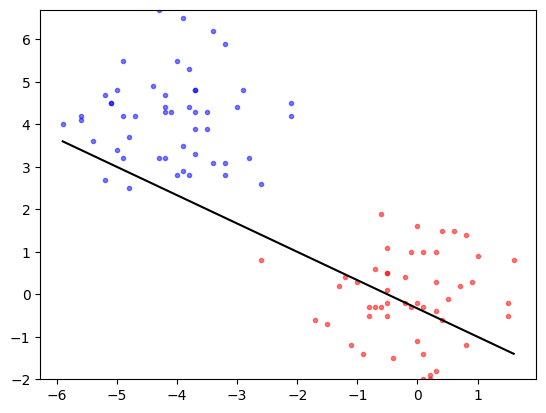

In [30]:
# plot (dummy) decision boundary
def plot_decision_boundary(X,w, a=1):
    x1 = np.linspace(min(X[:,0]),max(X[:,0]),10)
    m = -w[1]/w[2]
    c = -w[0]/w[2]
    x2 = m*x1+c
    plt.plot(x1,x2, c='k', alpha=a)
    plt.ylim(min(X[:,1]),max(X[:,1]))

# Dummy weights
w_dummy = [1,2,3]

plot_data(X_train,y_train)
plot_decision_boundary(X_train, w_dummy)

In [31]:
np.random.seed(42)
weights = np.random.normal(0, 1, 3)
bias = 1
weights

array([ 0.49671415, -0.1382643 ,  0.64768854])

In [32]:
weights[0] * bias + weights[1] * X_train[0, 0] + weights[2] * X_train[0, 1]

0.3628131486155711

In [33]:
1 * weights[0] + np.dot(X_train[0], weights[1:])

0.3628131486155711

In [34]:
def heaviside(z):
    if z >= 0:
        return 1
    else:
        return 0

In [49]:
weights = np.array([ 0.49671415, -0.1382643 ,  0.64768854])

for i in range(0, 5): # for each example (0 to 99) # X_train.shape[0]
    print(f'Feature vector is {X_train[i]} and the label {y_train[i]}')
    # make prediction
    z = np.dot(X_train[i], weights[1:]) + weights[0] * bias
    pred = heaviside(z)
    print(f'Dot product = {z:.2f}, so the prediction is = {pred:.1f}')
    # update weights
    print(f'Previous bias weight was {weights[0]}')
    print(f'Previous feature weights were {weights[1:]}\n LEARNING . . .')
    weights[0] += 0.1 * (y_train[i] - pred)
    weights[1:] += 0.1 * (y_train[i] - pred) * X_train[i]
    print(f'Current bias weight is {weights[0]}')
    print(f'Current feature weights are {weights[1:]}\n END OF ITERATION\n')

Feature vector is [ 0.5 -0.1] and the label 0.0
Dot product = 0.36, so the prediction is = 1.0
Previous bias weight was 0.49671415
Previous feature weights were [-0.1382643   0.64768854]
 LEARNING . . .
Current bias weight is 0.39671415
Current feature weights are [-0.1882643   0.65768854]
 END OF ITERATION

Feature vector is [0.6 1.5] and the label 0.0
Dot product = 1.27, so the prediction is = 1.0
Previous bias weight was 0.39671415
Previous feature weights were [-0.1882643   0.65768854]
 LEARNING . . .
Current bias weight is 0.29671415
Current feature weights are [-0.2482643   0.50768854]
 END OF ITERATION

Feature vector is [-0.2 -0.2] and the label 0.0
Dot product = 0.24, so the prediction is = 1.0
Previous bias weight was 0.29671415
Previous feature weights were [-0.2482643   0.50768854]
 LEARNING . . .
Current bias weight is 0.19671415
Current feature weights are [-0.2282643   0.52768854]
 END OF ITERATION

Feature vector is [1.6 0.8] and the label 0.0
Dot product = 0.25, so the

In [117]:
weights = np.array([ 0.49671415, -0.1382643 ,  0.64768854])
epochs = 10

for e in range(0, epochs):
    for i in range(0, X_train.shape[0]): 
        #print(f'Feature vector is {X_train[i]} and the label {y_train[i]}')
        # make prediction
        z = np.dot(X_train[i], weights[1:]) + weights[0] * bias
        pred = heaviside(z)
        #print(f'Dot product = {z:.2f}, so the prediction is = {pred:.1f}')
        # update weights
        #print(f'Previous bias weight was {weights[0]}')
        #print(f'Previous feature weights were {weights[1:]}\n LEARNING . . .')
        weights[0] += 0.1 * (y_train[i] - pred)
        weights[1:] += 0.1 * (y_train[i] - pred) * X_train[i]
        #print(f'Current bias weight is {weights[0]}')
        #print(f'Current feature weights are {weights[1:]}\n END OF ITERATION\n')

In [103]:
print(e)
print(weights)

9
[-1.20328585 -0.3482643   0.31768854]


In [105]:
#X_train[:,0]*weights[1] + X_train[:, 1]*weights[2] + weights[0]
[heaviside(i) for i in [X_train[:,0]*weights[1] + X_train[:, 1]*weights[2] + weights[0]][0]] == y_train

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

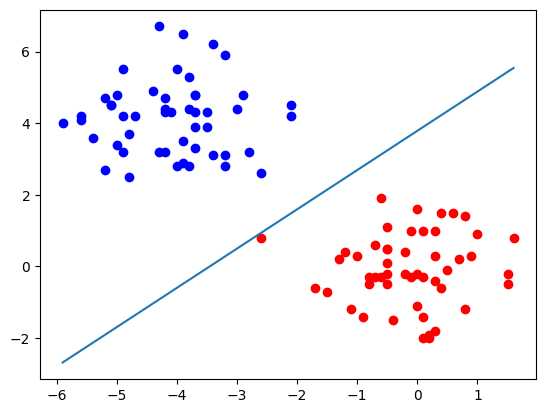

In [120]:
x1 = np.linspace(min(X_train[:, 0]), max(X_train[:, 0]), 10)
# 0 = X_train[:,0]*weights[1] + X_train[:, 1]*weights[2] + weights[0] - this is the boundary
# X_train[:, 1]*weights[2] = - X_train[:,0]*weights[1] - weights[0]
a = - weights[1] / weights[2]
c = - weights[0] / weights[2]
x2 = a*x1 + c
plt.plot(x1, x2)
plt.scatter(X_train[:50, 0], X_train[:50, 1], color='red')
plt.scatter(X_train[50:, 0], X_train[50:, 1], color='blue')
plt.show()

- Does it matter if we update weights after each iteration or sum the updates and add them at the end of an epoch?

Probably yes, since we would have obtained convergence earlier (in the middle of an epoch) but in the second approach we still continue to count till iterating over all examples - **this means that first approach yields a model thats fitted just at the edge of last mistake**

- Can we initialize the model with zeros?

I think yes, because we will start updating the weights as soon as we get to the examples with y=1 and label them as 0. But we don't progress till the half of examples if our training data is sorted by y.

In [100]:
weights = np.array([0., 0., 0.])
epochs = 10
weights_update = np.zeros(3)

for e in range(0, epochs):
    print(f'Epoch NR {e}')
    print(f'Old bias weight {weights[0]}')
    print(f'Old weights {weights[1:]}')
    for i in range(0, X_train.shape[0]): # for each example (0 to 99) # X_train.shape[0]
        #print(f'Feature vector is {X_train[i]} and the label {y_train[i]}')
        # make prediction
        z = np.dot(X_train[i], weights[1:]) + weights[0] * bias
        pred = heaviside(z)
        # update weights
        weights_update[0] += 0.1 * (y_train[i] - pred)
        #print(weights_update[0])
        weights_update[1:] += 0.1 * (y_train[i] - pred) * X_train[i]
        #print(weights_update[1:])

    weights[0] += weights_update[0]
    weights[1:] += weights_update[1:]
    print(f'New bias weight {weights[0]}')
    print(f'New weights {weights[1:]}\n')

Epoch NR 0
Old bias weight 0.0
Old weights [0. 0.]
New bias weight -4.999999999999998
New weights [0.68 0.34]

Epoch NR 1
Old bias weight -4.999999999999998
Old weights [0.68 0.34]
New bias weight -4.999999999999997
New weights [-19.09  21.41]

Epoch NR 2
Old bias weight -4.999999999999997
Old weights [-19.09  21.41]
New bias weight -7.399999999999998
New weights [-37.53  41.14]

Epoch NR 3
Old bias weight -7.399999999999998
Old weights [-37.53  41.14]
New bias weight -12.299999999999997
New weights [-54.56  59.58]

Epoch NR 4
Old bias weight -12.299999999999997
Old weights [-54.56  59.58]
New bias weight -19.69999999999999
New weights [-70.18  76.73]

Epoch NR 5
Old bias weight -19.69999999999999
Old weights [-70.18  76.73]
New bias weight -29.39999999999997
New weights [-84.53  92.51]

Epoch NR 6
Old bias weight -29.39999999999997
Old weights [-84.53  92.51]
New bias weight -41.29999999999994
New weights [-97.66 106.9 ]

Epoch NR 7
Old bias weight -41.29999999999994
Old weights [-97.

Why does it diverge?

## Previous version

In [73]:
def step_function(z):
    if z < 0:
      return 0
    if z >= 0:
      return 1

def perceptron(data, labels, lr, e):
    """
    data: numpy array of shape (m,n)
    labels: numpy array of shape (m,1)
    lr: learning rate
    e: number of epochs
    """
    bias = np.ones((data.shape[0], 1)) #len=100
    data = np.append(bias, data, axis=1)
    weights = [0, 0, 0]

    for epoch in range(0, e):
      for i in range(0, data.shape[0]): # for each example
        z = np.dot(data[i], weights) 
        y_pred = step_function(z)
        for j, w in enumerate(weights):
          weights[j] = w + lr*(labels[i] - y_pred) * data[i][j]
      print(weights)
    return weights

w = perceptron(X_train, y_train, 0.1, 20)
w

[-0.20000000000000004, -0.48000000000000004, 0.34]
[-0.6, -0.54, 0.29000000000000004]
[-0.7999999999999999, -0.5900000000000001, 0.44000000000000006]
[-0.9999999999999999, -0.5800000000000001, 0.45000000000000007]
[-1.0999999999999999, -0.52, 0.44000000000000006]
[-1.2, -0.41000000000000003, 0.5900000000000001]
[-1.3, -0.35000000000000003, 0.4000000000000001]
[-1.3, -0.35000000000000003, 0.4000000000000001]
[-1.3, -0.35000000000000003, 0.4000000000000001]
[-1.3, -0.35000000000000003, 0.4000000000000001]
[-1.3, -0.35000000000000003, 0.4000000000000001]
[-1.3, -0.35000000000000003, 0.4000000000000001]
[-1.3, -0.35000000000000003, 0.4000000000000001]
[-1.3, -0.35000000000000003, 0.4000000000000001]
[-1.3, -0.35000000000000003, 0.4000000000000001]
[-1.3, -0.35000000000000003, 0.4000000000000001]
[-1.3, -0.35000000000000003, 0.4000000000000001]
[-1.3, -0.35000000000000003, 0.4000000000000001]
[-1.3, -0.35000000000000003, 0.4000000000000001]
[-1.3, -0.35000000000000003, 0.4000000000000001]


[-1.3, -0.35000000000000003, 0.4000000000000001]

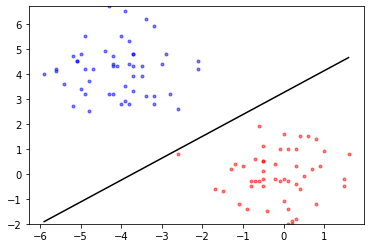

In [ ]:
def plot_decision_boundary(X,w, a=1):
    x1 = np.linspace(min(X[:,0]),max(X[:,0]),10)
    m = -w[1]/w[2]
    c = -w[0]/w[2]
    x2 = m*x1+c
    plt.plot(x1,x2, c='k', alpha=a)
    plt.ylim(min(X[:,1]),max(X[:,1]))
    
plot_data(X_train,y_train)
plot_decision_boundary(X_train, w)

07.03

perceptron limitations:
- no probability
- XOR - smaller than 0 and more than 3

multilayer
- extra hidden layer, fully connected with input and output

backpropagation
- step function doesnt allow calculating the gradient - we can use activation function for that purpose (sigmoid)
1. make prediction
2. apply activation function (sigmoid)
3. outputs as inputs to the next layer
4. count error and update weights (for every layer)

forward pass, intermediate results for each neuron, count error, chain rule

CAUTION: you cant initialize weights with the same values (so that they cant behave as a one neuron), random may be not good enough either

many activation functions (sigmoid, RELU, tanh)

slide 30 - how many parameters needs to be optimized

validation dataset for overfitting (validating against train and validation data, to see the breaking point)
